In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202209-202209.nc'
file_path1 = '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202210-202210.nc'

In [71]:
!pip install netCDF4
import pandas as pd
import xarray as xr
!pip install xarray matplotlib
import netCDF4 as nc


In [24]:
# Open the NetCDF file
dataset = nc.Dataset(file_path, 'r')
ds = xr.open_dataset(file_path)
df = ds.to_dataframe()
# # Print global attributes
# print("Global attributes:")
# print(dataset.__dict__)

# # Print variables and their attributes
# print("\nVariables:")
# for var_name, var in dataset.variables.items():
#     print(f"{var_name}: {var[:]}")
#     print(f"  Attributes: {var.__dict__}")
print(dataset)
#Close the NetCDF file
print(df)
dataset.close()


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Title: Hybrid PM_2_._5 [\mug/m^3]
    Contact: Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
    References: van Donkelaar et al., Monthly Global Estimates of Fine Particulate Matter and Their Uncertainty, Environ. Sci. & Tech., doi:10.1021/acs.est.1c05309.
    Filename: C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMonthlyGWR-Geo20230818-GM20230905-V20230921\NetCDF\GWRPM25\Asia\Monthly\V5GL04.HybridPM25.Asia.202209-202209.nc
    Format: NetCDF-4
    Delta_Lat: 0.010000228881835938
    Delta_Lon: 0.0099945068359375
    SpatialCoverage: Asia
    Start_Date: 20220101
    End_Date: 20221231
    dimensions(sizes): lon(8000), lat(5500)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 GWRPM25(lat, lon)
    groups: 
                       GWRPM25
lon        lat                
65.004997  -9.995000       NaN
           -9.985000       NaN
           -9.975000      

In [70]:
dataset = xr.open_dataset(file_path)
#dataset
x= dataset['GWRPM25']
print(x)

for attribute_name, attribute_value in x.attrs.items():
  print(f"{attribute_name}: {attribute_value}")

# #print(f"Attributes for variable '{variable_name}':")
# for attribute_name in x.attrs:
#     attribute_value = getattr(x, attribute_name)
#     print(f"{attribute_name}: {attribute_value}")

# # Close the NetCDF file
# nc_file.close()
#print(x.attrs)

# y=x.long_name
# y
#dataset.Data_variables

<xarray.DataArray 'GWRPM25' (lat: 5500, lon: 8000)>
[44000000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 65.0 65.01 65.03 65.04 ... 145.0 145.0 145.0 145.0
  * lat      (lat) float64 -9.995 -9.985 -9.975 -9.965 ... 44.97 44.99 44.99
Attributes:
    long_name:  Hybrid PM_2_._5 [\mug/m^3]
    units:      [\mug/m^3]
long_name: Hybrid PM_2_._5 [\mug/m^3]
units: [\mug/m^3]


In [73]:
dataset = xr.open_dataset(file_path)
#dataset
x= dataset
print(x)

<xarray.Dataset>
Dimensions:  (lon: 8000, lat: 5500)
Coordinates:
  * lon      (lon) float64 65.0 65.01 65.03 65.04 ... 145.0 145.0 145.0 145.0
  * lat      (lat) float64 -9.995 -9.985 -9.975 -9.965 ... 44.97 44.99 44.99
Data variables:
    GWRPM25  (lat, lon) float32 ...
Attributes:
    Title:            Hybrid PM_2_._5 [\mug/m^3]
    Contact:          Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
    References:       van Donkelaar et al., Monthly Global Estimates of Fine ...
    Filename:         C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMon...
    Format:           NetCDF-4
    Delta_Lat:        0.010000228881835938
    Delta_Lon:        0.0099945068359375
    SpatialCoverage:  Asia
    Start_Date:       20220101
    End_Date:         20221231


Q) 1 a

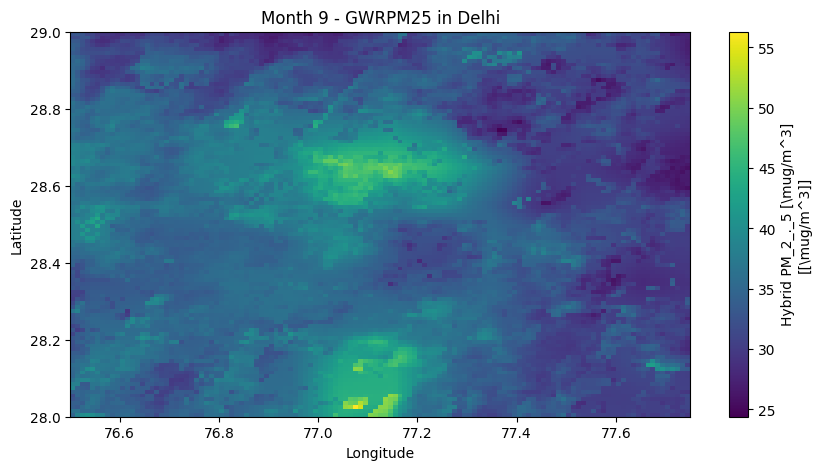

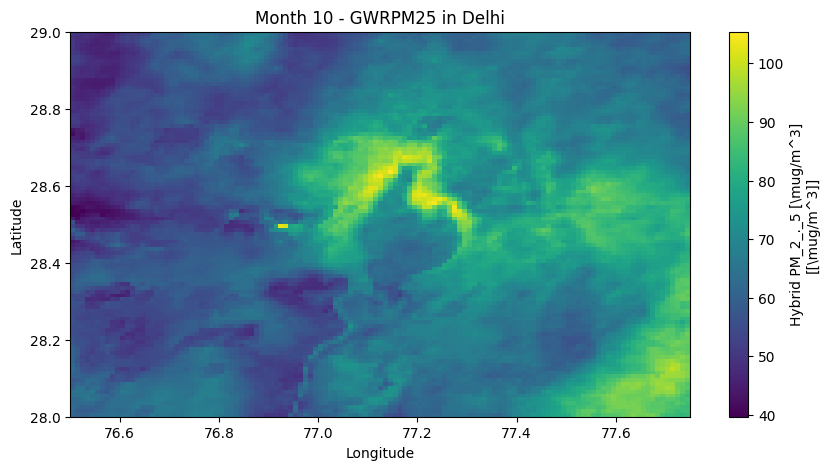

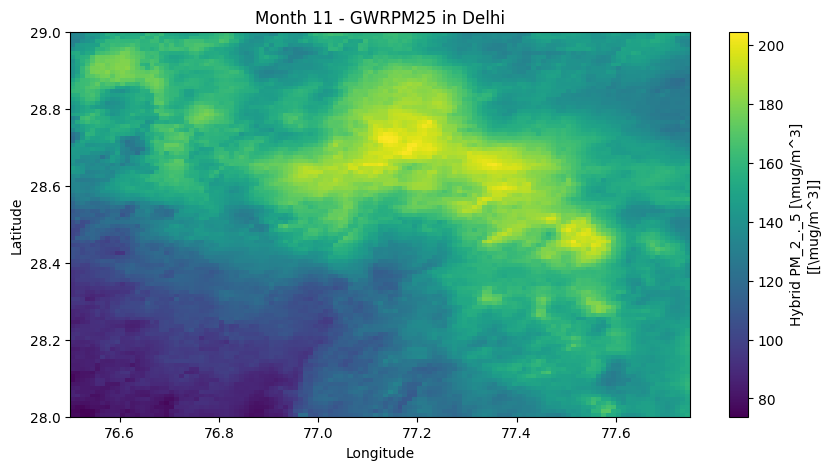

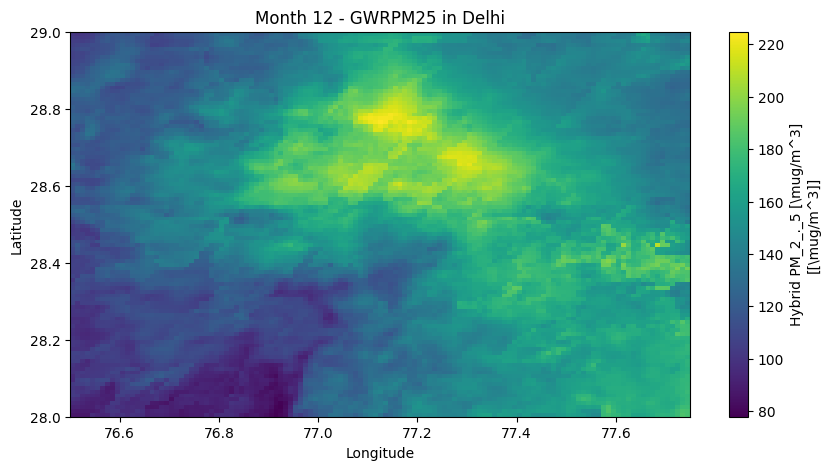

In [6]:
import xarray as xr
import matplotlib.pyplot as plt

def read_and_visualize_variable(file_paths, variable_name):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Create a list to store datasets for each month
    datasets = []

    # Read and trim each NetCDF file
    for file_path in file_paths:
        dataset = xr.open_dataset(file_path)

        # Find the latitude and longitude coordinates in the dataset
        lat_name, lon_name = find_lat_lon_coordinates(dataset)

        # Manually select the closest latitude and longitude values
        delhi_dataset = dataset.sel({lat_name: delhi_bounds['lat'], lon_name: delhi_bounds['lon']})

        # Append the trimmed dataset to the list
        datasets.append(delhi_dataset)

    # Visualize the specified variable using Matplotlib
    for i, dataset in enumerate(datasets):
        # Plot the specified variable
        plt.figure(figsize=(10, 5))

        x=dataset[variable_name]

        x.plot()
        plt.title(f"Month {i+9} - {variable_name} in Delhi")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

def find_lat_lon_coordinates(dataset):
    # Function to find latitude and longitude coordinate names
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_name = coord_name
        elif 'lon' in coord_name.lower():
            lon_name = coord_name
    return lat_name, lon_name

# Provide the file paths for September to December 2022
file_paths = [
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202209-202209.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202210-202210.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202211-202211.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202212-202212.nc',
]


# Specify the variable to visualize
variable_of_interest = 'GWRPM25'

# Call the function
read_and_visualize_variable(file_paths, variable_of_interest)


Q)1 b

[<xarray.Dataset>
Dimensions:  (lon: 125, lat: 100)
Coordinates:
  * lon      (lon) float64 76.5 76.51 76.53 76.54 ... 77.71 77.72 77.74 77.75
  * lat      (lat) float64 28.0 28.01 28.02 28.03 ... 28.97 28.98 28.99 29.0
Data variables:
    GWRPM25  (lat, lon) float32 ...
Attributes:
    Title:            Hybrid PM_2_._5 [\mug/m^3]
    Contact:          Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
    References:       van Donkelaar et al., Monthly Global Estimates of Fine ...
    Filename:         C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMon...
    Format:           NetCDF-4
    Delta_Lat:        0.010000228881835938
    Delta_Lon:        0.0099945068359375
    SpatialCoverage:  Asia
    Start_Date:       20220101
    End_Date:         20221231, <xarray.Dataset>
Dimensions:  (lon: 125, lat: 100)
Coordinates:
  * lon      (lon) float64 76.5 76.51 76.53 76.54 ... 77.71 77.72 77.74 77.75
  * lat      (lat) float64 28.0 28.01 28.02 28.03 ... 28.97 28.98 28.99 29.0
Data var

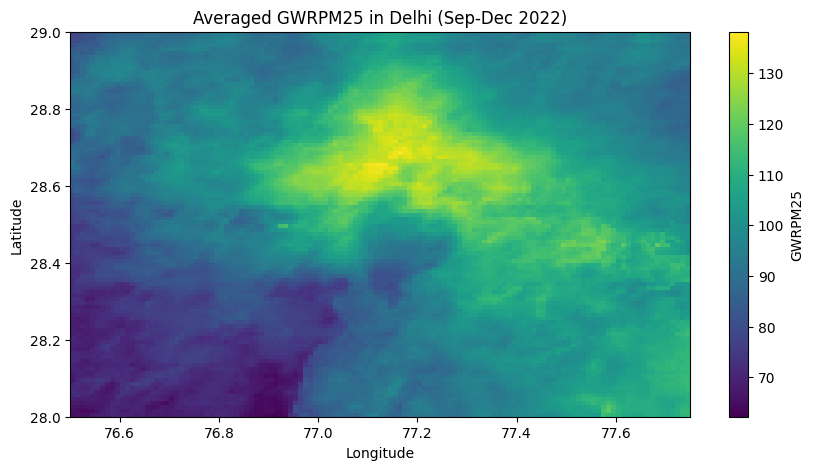

In [13]:
import xarray as xr
import matplotlib.pyplot as plt

def read_and_visualize_Average(file_paths, variable_name):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Create a list to store datasets for each month
    datasets = []

    # Read and trim each NetCDF file
    for file_path in file_paths:
        dataset = xr.open_dataset(file_path)

        # Find the latitude and longitude coordinates in the dataset
        lat_name, lon_name = find_lat_lon_coordinates(dataset)

        # Manually select the closest latitude and longitude values
        delhi_dataset = dataset.sel({lat_name: delhi_bounds['lat'], lon_name: delhi_bounds['lon']})

        # Append the trimmed dataset to the list
        datasets.append(delhi_dataset)
    print(datasets)

    # Compute the average of all datasets
    average_dataset = xr.concat(datasets, dim='time').mean(dim='time')

    # Plot the average of the specified variable
    plt.figure(figsize=(10, 5))
    average_dataset[variable_name].plot()
    plt.title(f"Averaged {variable_name} in Delhi (Sep-Dec 2022)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

def find_lat_lon_coordinates(dataset):
    # Function to find latitude and longitude coordinate names
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_name = coord_name
        elif 'lon' in coord_name.lower():
            lon_name = coord_name
    return lat_name, lon_name


# Provide the file paths for September to December 2022
file_paths = [
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202209-202209.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202210-202210.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202211-202211.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202212-202212.nc',
]

# Specify the variable to visualize
variable_of_interest = 'GWRPM25'

# Call the function
read_and_visualize_Average(file_paths, variable_of_interest)


Q)1 c

In [50]:
import xarray as xr

def find_max_pm25_location(file_paths):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Initialize a dictionary to store the result for each month
    result_dict = {}

    # Iterate through the monthly NetCDF files
    for i, file_path in enumerate(file_paths):
        # Read the NetCDF file
        dataset = xr.open_dataset(file_path)



        # Manually select the closest latitude and longitude values within Delhi's bounds
        delhi_dataset = dataset.sel(lat=delhi_bounds['lat'], lon=delhi_bounds['lon'])
        lat_value, lon_value = find_lat_lon_coordinates_values(delhi_dataset)

        # Find the indices of the maximum PM2.5 value at each time step
        max_pm25_indices = delhi_dataset['GWRPM25'].argmax(dim=('lat', 'lon'))  # Assuming lat is the latitude dimension

        # Get the corresponding latitude and longitude values
        lat_values = lat_value[int(max_pm25_indices['lat'])]
        lon_values = lon_value[int(max_pm25_indices['lon'])]

        # Get the maximum PM2.5 values
        max_pm25_values = delhi_dataset['GWRPM25'].max(dim=('lat', 'lon')).values

        # Store the result in the dictionary
        result_dict[i + 9] = {'lat': lat_values, 'lon': lon_values, 'pm25_value': max_pm25_values}

        # Close the dataset
        dataset.close()

    return result_dict

# Provide the file paths for September to December 2022
file_paths = [
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202209-202209.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202210-202210.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202211-202211.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202212-202212.nc',
]

# Call the function
def find_lat_lon_coordinates_values(dataset):
    # Function to find latitude and longitude coordinate values
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_values = dataset.coords[coord_name].values
        elif 'lon' in coord_name.lower():
            lon_values = dataset.coords[coord_name].values
    return lat_values, lon_values



result_dict = find_max_pm25_location(file_paths)

# Print the result
for month, values in result_dict.items():
    print(f"Month {month}: Max PM2.5 values {values['pm25_value']} at latitude {values['lat']}, longitude {values['lon']}")


Month 9: Max PM2.5 values 56.29999923706055 at latitude 28.024999618530273, longitude 77.07499694824219
Month 10: Max PM2.5 values 105.4000015258789 at latitude 28.635000228881836, longitude 77.1449966430664
Month 11: Max PM2.5 values 204.60000610351562 at latitude 28.69499969482422, longitude 77.18499755859375
Month 12: Max PM2.5 values 224.8000030517578 at latitude 28.764999389648438, longitude 77.125


Q)1 d

In [ ]:
class Python_class:
  def find_max_pm25_location(file_paths):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Initialize a dictionary to store the result for each month
    result_dict = {}

    # Iterate through the monthly NetCDF files
    for i, file_path in enumerate(file_paths):
        # Read the NetCDF file
        dataset = xr.open_dataset(file_path)



        # Manually select the closest latitude and longitude values within Delhi's bounds
        delhi_dataset = dataset.sel(lat=delhi_bounds['lat'], lon=delhi_bounds['lon'])
        lat_value, lon_value = find_lat_lon_coordinates_values(delhi_dataset)

        # Find the indices of the maximum PM2.5 value at each time step
        max_pm25_indices = delhi_dataset['GWRPM25'].argmax(dim=('lat', 'lon'))  # Assuming lat is the latitude dimension

        # Get the corresponding latitude and longitude values
        lat_values = lat_value[int(max_pm25_indices['lat'])]
        lon_values = lon_value[int(max_pm25_indices['lon'])]

        # Get the maximum PM2.5 values
        max_pm25_values = delhi_dataset['GWRPM25'].max(dim=('lat', 'lon')).values

        # Store the result in the dictionary
        result_dict[i + 9] = {'lat': lat_values, 'lon': lon_values, 'pm25_value': max_pm25_values}

        # Close the dataset
        dataset.close()

    return result_dict
  def read_and_visualize_Average(file_paths, variable_name):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Create a list to store datasets for each month
    datasets = []

    # Read and trim each NetCDF file
    for file_path in file_paths:
        dataset = xr.open_dataset(file_path)

        # Find the latitude and longitude coordinates in the dataset
        lat_name, lon_name = find_lat_lon_coordinates(dataset)

        # Manually select the closest latitude and longitude values
        delhi_dataset = dataset.sel({lat_name: delhi_bounds['lat'], lon_name: delhi_bounds['lon']})

        # Append the trimmed dataset to the list
        datasets.append(delhi_dataset)
    print(datasets)

    # Compute the average of all datasets
    average_dataset = xr.concat(datasets, dim='time').mean(dim='time')

    # Plot the average of the specified variable
    plt.figure(figsize=(10, 5))
    average_dataset[variable_name].plot()
    plt.title(f"Averaged {variable_name} in Delhi (Sep-Dec 2022)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


  def read_and_visualize_variable(file_paths, variable_name):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Create a list to store datasets for each month
    datasets = []

    # Read and trim each NetCDF file
    for file_path in file_paths:
        dataset = xr.open_dataset(file_path)

        # Find the latitude and longitude coordinates in the dataset
        lat_name, lon_name = find_lat_lon_coordinates(dataset)

        # Manually select the closest latitude and longitude values
        delhi_dataset = dataset.sel({lat_name: delhi_bounds['lat'], lon_name: delhi_bounds['lon']})

        # Append the trimmed dataset to the list
        datasets.append(delhi_dataset)

    # Visualize the specified variable using Matplotlib
    for i, dataset in enumerate(datasets):
        # Plot the specified variable
        plt.figure(figsize=(10, 5))

        x=dataset[variable_name]

        x.plot()
        plt.title(f"Month {i+9} - {variable_name} in Delhi")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()


  def find_lat_lon_coordinates_values(dataset):
    # Function to find latitude and longitude coordinate values
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_values = dataset.coords[coord_name].values
        elif 'lon' in coord_name.lower():
            lon_values = dataset.coords[coord_name].values
    return lat_values, lon_values

  def find_lat_lon_coordinates(dataset):
    # Function to find latitude and longitude coordinate names
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_name = coord_name
        elif 'lon' in coord_name.lower():
            lon_name = coord_name
    return lat_name, lon_name


  file_paths = [
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202209-202209.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202210-202210.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202211-202211.nc',
    '/content/gdrive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/V5GL04.HybridPM25.Asia.202212-202212.nc',
]

Q)2

[<xarray.Dataset>
Dimensions:  (lon: 125, lat: 100)
Coordinates:
  * lon      (lon) float64 76.5 76.51 76.53 76.54 ... 77.71 77.72 77.74 77.75
  * lat      (lat) float64 28.0 28.01 28.02 28.03 ... 28.97 28.98 28.99 29.0
Data variables:
    GWRPM25  (lat, lon) float32 ...
Attributes:
    Title:            Hybrid PM_2_._5 [\mug/m^3]
    Contact:          Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
    References:       van Donkelaar et al., Monthly Global Estimates of Fine ...
    Filename:         C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMon...
    Format:           NetCDF-4
    Delta_Lat:        0.010000228881835938
    Delta_Lon:        0.0099945068359375
    SpatialCoverage:  Asia
    Start_Date:       20210101
    End_Date:         20211231, <xarray.Dataset>
Dimensions:  (lon: 125, lat: 100)
Coordinates:
  * lon      (lon) float64 76.5 76.51 76.53 76.54 ... 77.71 77.72 77.74 77.75
  * lat      (lat) float64 28.0 28.01 28.02 28.03 ... 28.97 28.98 28.99 29.0
Data var

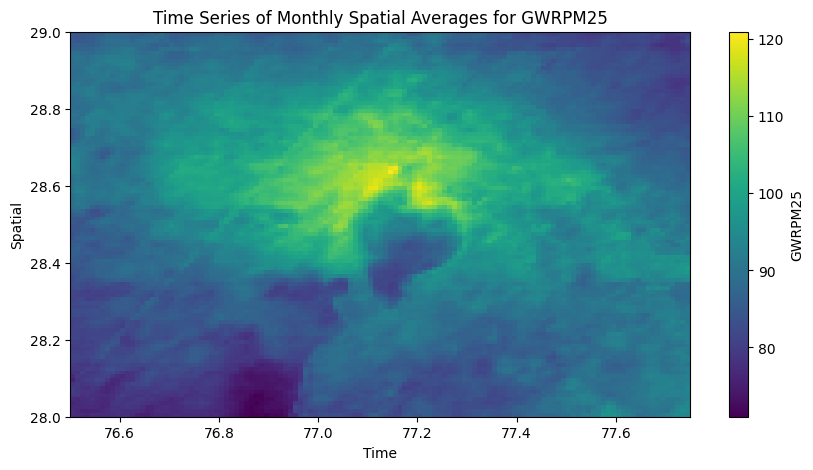

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

def read_and_visualize_Average(file_paths, variable_name):
    # Define the latitude and longitude bounds for Delhi
    delhi_bounds = {'lat': slice(28, 29), 'lon': slice(76.5, 77.75)}

    # Create a list to store datasets for each month
    datasets = []

    # Read and trim each NetCDF file
    for file_path in file_paths:
        dataset = xr.open_dataset(file_path)

        # Find the latitude and longitude coordinates in the dataset
        lat_name, lon_name = find_lat_lon_coordinates(dataset)

        # Manually select the closest latitude and longitude values
        delhi_dataset = dataset.sel({lat_name: delhi_bounds['lat'], lon_name: delhi_bounds['lon']})

        # Append the trimmed dataset to the list
        datasets.append(delhi_dataset)
    print(datasets)

    # Compute the average of all datasets
    average_dataset = xr.concat(datasets, dim='time').mean(dim='time')

    # Plot the average of the specified variable
    plt.figure(figsize=(10, 5))
    average_dataset[variable_name].plot()
    plt.title(f"Time Series of Monthly Spatial Averages for {variable_name}")
    plt.xlabel("Time")
    plt.ylabel("Spatial")
    plt.show()

def find_lat_lon_coordinates(dataset):
    # Function to find latitude and longitude coordinate names
    for coord_name in dataset.coords:
        if 'lat' in coord_name.lower():
            lat_name = coord_name
        elif 'lon' in coord_name.lower():
            lon_name = coord_name
    return lat_name, lon_name


# Provide the file paths for September to December 2022
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202101-202101.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202102-202102.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202103-202103.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202104-202104.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202105-202105.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202106-202106.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202107-202107.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202108-202108.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202109-202109.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202110-202110.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202111-202111.nc',
    '/content/drive/MyDrive/Colab Notebooks/TASK_FOR_CEEW/2021/V5GL04.HybridPM25.Asia.202112-202112.nc',
]

# Specify the variable to visualize
variable_of_interest = 'GWRPM25'

# Call the function
read_and_visualize_Average(file_paths, variable_of_interest)
